## Numerical Integration of Schrödinger Equation
### For a Single-Qubit System with Time-Dependent Hamiltonian

In [1]:
%matplotlib inline

from math import *
from qutip import *
from pylab import *

# import numpy as np
import matplotlib.pyplot as plt

### Variables, Operators, & Initial State
- $\psi(t=0) = \ket{0}$
- $\frac{\omega_q}{2\pi} = \frac{\omega_d}{2\pi} = 5 \text{GHz}$
- $\frac{\epsilon_d}{2\pi} = 0.25 \text{GHz}$

In [2]:
# dimension of Hilbert space, 2 for qubits
DIM = 2

In [3]:
# frequencies (in GHz)
OMEGA = 2*pi * 5
EPSILON = 2*pi * 0.25

# time steps (in μs)
T_0 = 0
T = 4
DT = 0.0005

# initial state |0>
PSI_O = fock(DIM, 0)

### Numerical Integration Function
$\frac{\hat{H}}{\hbar} = \frac{1}{2}\omega_q\sigma_z + \epsilon_d\cos(\omega_d t)\sigma_x$


In [4]:
# time span
TIMES = [T_0]
for i in arange(T_0, T, DT):
    TIMES.append(i+DT)

# numerical integration
def wavefunction(epsilon):
    psi_t = [PSI_O]
    psi_next = PSI_O
    for i in arange(T_0, T, DT):
        H = (1/2)*OMEGA*sigmaz() + epsilon*cos(OMEGA*i)*sigmax()
        U = (-1j*H*DT).expm()
        psi_next = U*psi_next
        psi_t.append(psi_next)
    return psi_t

### Run Numerical Integration Using $\epsilon = 2\pi * 0.25 \text{GHz}$

In [5]:
# results
psi_t_EPSILON = wavefunction(EPSILON)

### Plot on Bloch Sphere

In [6]:
b = Bloch()
b.add_states(psi_t_EPSILON, 'point')

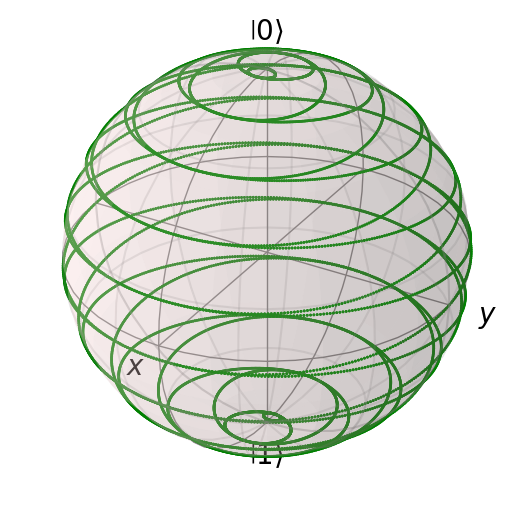

In [7]:
b.point_color = ['g']
b.point_marker = ['o']
b.point_size = [1]
b.show()

### Plot Bloch Vector Position vs. Time

In [8]:
x = []
y = []
z = []

for p in b.points:
    x.append(p[0,0])
    y.append(p[1,0])
    z.append(p[2,0])


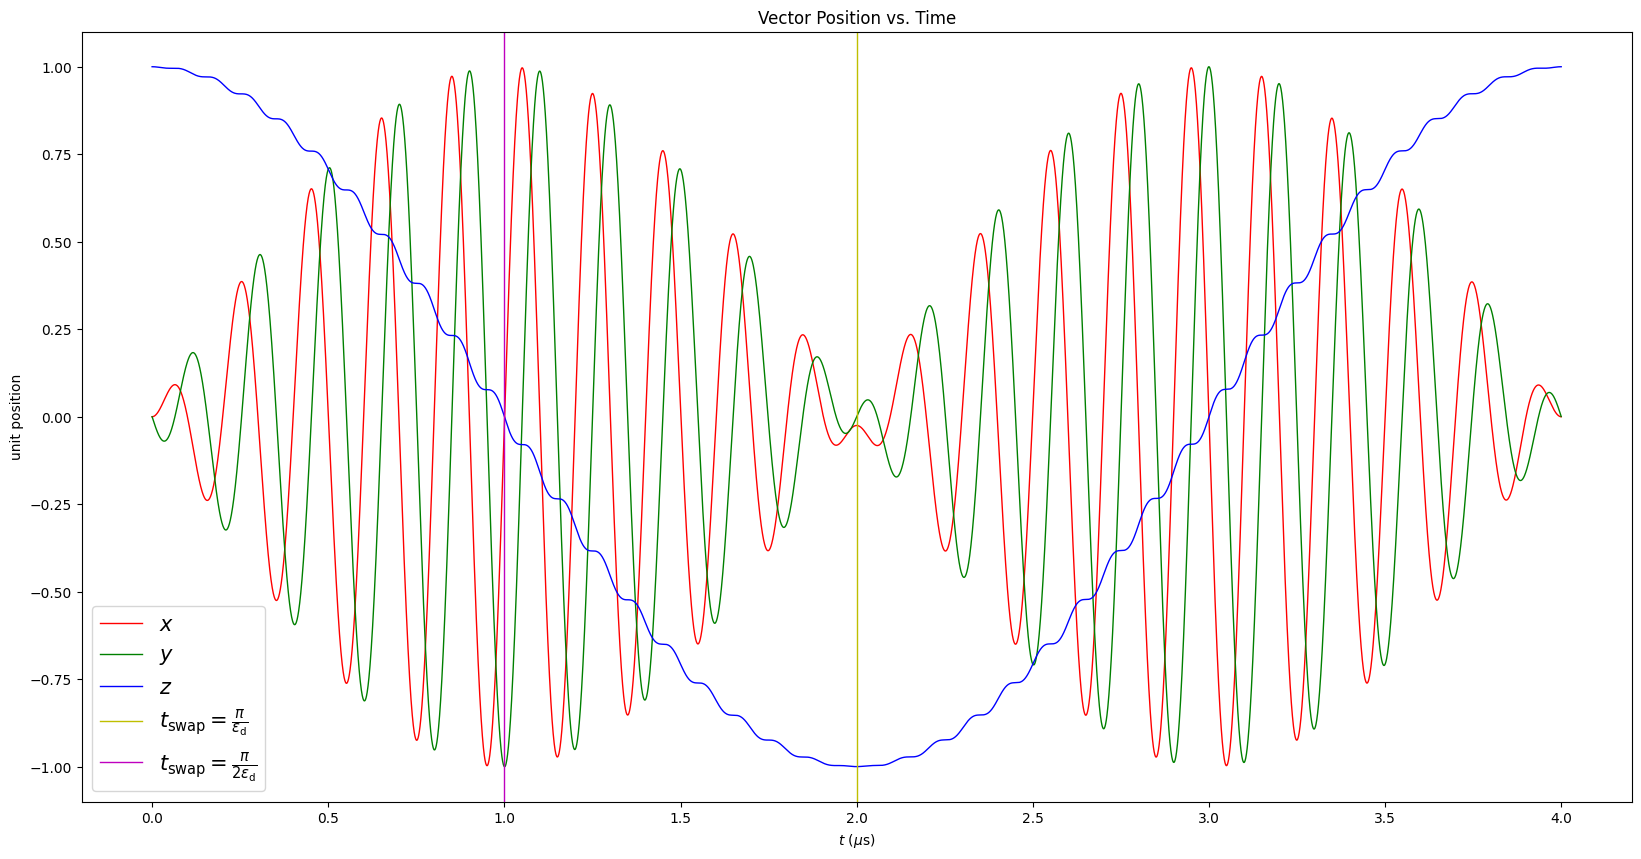

In [9]:
plt.figure(figsize=(20, 10))

plt.plot(TIMES, x, 'r-', linewidth=1, label=r'$x$')
plt.plot(TIMES, y, 'g-', linewidth=1, label=r'$y$')
plt.plot(TIMES, z, 'b-', linewidth=1, label=r'$z$')

plt.axvline(x=pi/EPSILON, color='y', lw=1, label=r'$t_\text{swap} = \frac{\pi}{\epsilon_\text{d}}$')
plt.axvline(x=pi/(2*EPSILON), color='m', lw=1, label=r'$t_\text{swap} = \frac{\pi}{2\epsilon_\text{d}}$')

plt.title('Vector Position vs. Time')
plt.xlabel(r'$t\ (\mu \text{s})$')
plt.ylabel('unit position')

plt.legend(loc='best', prop={'size': 15})

plt.show()

### Comments:
#### Here we see that at $t_\text{swap} = \frac{\pi}{\epsilon_d}$, the Cartesian position of the qubit vector is numerically predicted to be at $(x,y,z) = (0,0,-1)$, which corresponds to the qubit being in the $\ket{1}$ state. And at $t_\text{entangle} = \frac{\pi}{2\epsilon_d}$ the qubit vector is at $(x,y,z) = (0,-1,0)$, which corresponds to the qubit being in the $\ket{-}$ state.
#### These numerical calculations correspond to the results found in part **d)**. Additionally, we see that the pattern of change in (x,y,z) with respect to time corresponds to the results found in **b)**.

### $\pi$-Pulse Infidelity

In [10]:
# target density operator ρ_target
RHO_TARGET = fock(2,1)*fock(2,1).dag()

# arrays to restore results
epsilons = []
infidelity_mins = []

# loop over suspected range of ε
for ep in arange(0.4, 0.8, 0.01):
    # using ε = ep
    epsilons.append(ep)
    
    # numerically calculate ψ(t)
    psi_t_epsilon = wavefunction(ep)

    # calculate π pulse infidelities for ψ(t)
    pi_infidelity = []
    for psi in psi_t_epsilon:
        rho = psi*psi.dag()
        pi_infidelity.append(1 - (rho*RHO_TARGET).tr())
    
    # store min infidelity
    infidelity_mins.append(min(pi_infidelity))


In [11]:
ep_lowest = infidelity_below_5 = 0

for i, infidelity_min in enumerate(infidelity_mins):
    print(epsilons[i], " ", infidelity_min)
    if (infidelity_min < 0.05):
        ep_lowest = epsilons[i]
        infidelity_below_5 = infidelity_min
        break

0.4   0.4854177227762063
0.41000000000000003   0.465444227866586
0.42000000000000004   0.44552606343791334
0.43000000000000005   0.42569509391868576
0.44000000000000006   0.4059830440880673
0.45000000000000007   0.3864214483207128
0.4600000000000001   0.3670416001324903
0.4700000000000001   0.3478745021164502
0.4800000000000001   0.3289508163406485
0.4900000000000001   0.31030081529437337
0.5000000000000001   0.29195433345552213
0.5100000000000001   0.27394071956320876
0.5200000000000001   0.25628878966190216
0.5300000000000001   0.23902678100542485
0.5400000000000001   0.22218230688269414
0.5500000000000002   0.20578231244361334
0.5600000000000002   0.1898530315949608
0.5700000000000002   0.17441994503479208
0.5800000000000002   0.15950773949110375
0.5900000000000002   0.1451402682341093
0.6000000000000002   0.13134051291891213
0.6100000000000002   0.11813054682691693
0.6200000000000002   0.10553149955783203
0.6300000000000002   0.09356352323452288
0.6400000000000002   0.0822457602719

In [12]:
print('ε: ', ep_lowest, ' infidelity min: ', infidelity_below_5*100)

ε:  0.6800000000000003  infidelity min:  4.382268300890968


### Lowest $\epsilon_d$ for which infidelity is less than $5\%$ was found to be $\epsilon_d = 0.68\text{GHz}$